In [2]:
import math

def calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch):
    t=days_until_maturity/(365*time_stretch)
    T=days_until_maturity/365
    return y_reserves*(-(2/((1-T*APY/100)**(1/t)-1))-2)

def calc_price(x_reserves,y_reserves,total_supply,days_until_maturity,time_stretch):
  t=days_until_maturity/(365*time_stretch)
  return 1/((y_reserves + total_supply)/x_reserves)**t

def calc_k(in_reserves,out_reserves,t):
  return pow(in_reserves,1-t) + pow(out_reserves,1-t)

def calc_apy(price,days_until_maturity):
  T=days_until_maturity/365
  return (1-price)/T * 100

def calc_realapy(price,days_until_maturity):
  T=days_until_maturity/365
  #return (pow(1/price,1/T)-1) * 100 ## annual compounding
  return (1-price)/T/price * 100

def is_trade_valid(in_,in_reserves,out_reserves,t):
  k = pow(in_reserves,1-t) + pow(out_reserves,1-t)
  check = math.log(k)/math.log(in_reserves + in_) + t
  return True if check >= 1 else False

def calc_max_trade(in_reserves,out_reserves,t):
  k = pow(in_reserves,1-t) + pow(out_reserves,1-t)
  return k**(1/(1-t)) - in_reserves

def calc_out_given_in(in_,in_reserves,out_reserves,token_out,g,t):
        k=pow(in_reserves,1-t) + pow(out_reserves,1-t)
        without_fee = out_reserves - pow(k-pow(in_reserves+in_,1-t),1/(1-t))
        if token_out == "base":
            fee =  (in_-without_fee)*g
            with_fee = without_fee-fee
        elif token_out == "fyt":
            fee =  (without_fee-in_)*g
            with_fee = without_fee-fee   
        return (with_fee,without_fee,fee)
    

(APY,y_reserves,days_until_maturity,time_stretch): (20, 100, 90, 4.43)
required x_reserves: 135.05955176943579
resulting price: 0.9506849315068493
check apy: 20.00000000000001


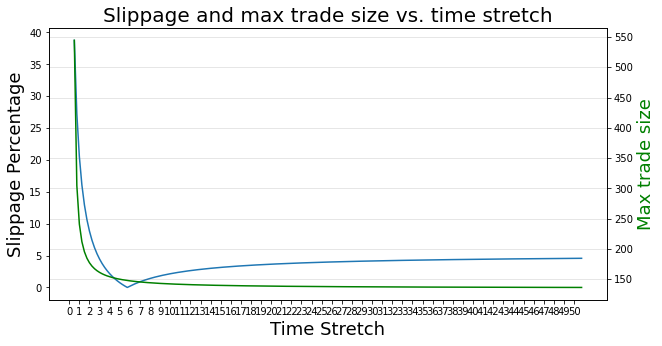

In [40]:
import matplotlib.pyplot as plt
import numpy as np
APY = 20
days_until_maturity = 90
time_stretch = 4.43
y_reserves = 100
x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
print("(APY,y_reserves,days_until_maturity,time_stretch): "+str((APY,y_reserves,days_until_maturity,time_stretch)))
print("required x_reserves: " + str(x_reserves))
total_supply=x_reserves+y_reserves
price=calc_price(x_reserves,y_reserves,total_supply,days_until_maturity,time_stretch)
print("resulting price: " + str(price))
print("check apy: " + str(calc_apy(price,days_until_maturity)))
g=0.1

for amount in [95,106,152]:
    t=days_until_maturity/(365*time_stretch)
    (with_fee,without_fee,fee)=calc_out_given_in(amount,y_reserves+total_supply,x_reserves,"base",g,t)
    without_slippage_or_fee = price * amount
    slippage = abs(without_slippage_or_fee-without_fee)
"""     print("\nTrade size: " + str(amount))
    print("Price w/o slippage: " + str(without_slippage_or_fee))
    print("Price with slippage: " + str(without_fee))
    print("Price with slippage and fee: " + str(with_fee))
    print("Total fee: " + str(fee))
    print("Percent slippage: " + str(slippage/without_slippage_or_fee * 100))
    print("check apy: " + str(calc_apy(with_fee/amount,days_until_maturity)))
    print("x_reserves = {:} vs price_with_slippage_fee = {:}".format(x_reserves, with_fee))
    print("is valid trade = {:}".format(is_trade_valid(amount,y_reserves+total_supply,x_reserves,t)))
    print("max valid trade = {:}".format(calc_max_trade(y_reserves+total_supply,x_reserves,t))) """

slippage_data = []
max_trade_data = []
amount = 50
timestretch_values = np.arange(0.5,51,0.25)
for time_stretch in timestretch_values:
    t=days_until_maturity/(365*time_stretch)
    (with_fee,without_fee,fee)=calc_out_given_in(amount,y_reserves+total_supply,x_reserves,"base",g,t)
    without_slippage_or_fee = price * amount
    slippage = abs(without_slippage_or_fee-without_fee)
    slippage_percentage = (slippage/without_slippage_or_fee * 100)
    slippage_data.append(slippage_percentage)
    max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,t)
    max_trade_data.append(max_trade)
    #print("max valid trade (ts={:.2f}) = {:}\n".format(time_stretch,max_trade))

fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
ax.set_xlabel("Time Stretch",fontsize=18)
ax.set_ylabel("Slippage Percentage",fontsize=18)
ax.set_xticks(np.arange(0, 51, 1))
#ax.set_ylim(0,50)
#ax.set_yticks(np.arange(0, 51, 5))
#ax.set_yticks(np.arange(0, 105, 5))
p=ax.plot(timestretch_values, slippage_data)
p2=ax2.plot(timestretch_values, max_trade_data, 'g-')
plt.title("Slippage and max trade size vs. time stretch",fontsize=20 )
ax2.set_ylabel("Max trade size",fontsize=18,color='green')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.2)
plt.show()

'#1f77b4'

'#ff7f0e'

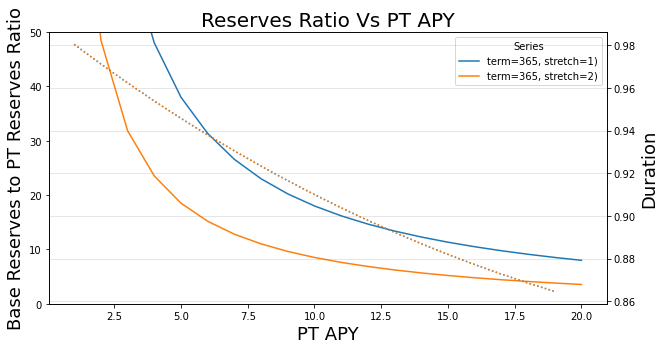

,APY,realAPY,Ratio,calcPrice,realPrice,x_res,y_res,tot_sup,deltaAPY,deltaPrice,deltaAPY%,deltaPrice%,Duration
0,1.0,1.010101,98.502513,0.99,0.990099,9850.251256,100.0,9950.251256,1.030715,-0.009707,1.030715,-0.009805,0.980490
1,2.0,2.040816,48.505051,0.98,0.980392,4850.505051,100.0,4950.505051,1.051967,-0.009518,0.525984,-0.009713,0.971262
2,3.0,3.092784,31.840948,0.97,0.970874,3184.094755,100.0,3284.094755,1.073883,-0.009335,0.357961,-0.009624,0.962405
3,4.0,4.166667,23.510204,0.96,0.961538,2351.020408,100.0,2451.020408,1.096491,-0.009158,0.274123,-0.009539,0.953907
4,5.0,5.263158,18.512821,0.95,0.952381,1851.282051,100.0,1951.282051,1.119821,-0.008985,0.223964,-0.009458,0.945761
5,6.0,6.382979,15.182131,0.94,0.943396,1518.213058,100.0,1618.213058,1.143903,-0.008817,0.190650,-0.009380,0.937956
6,7.0,7.526882,12.803849,0.93,0.934579,1280.384900,100.0,1380.384900,1.168770,-0.008654,0.166967,-0.009305,0.930485
7,8.0,8.695652,11.020833,0.92,0.925926,1102.083333,100.0,1202.083333,1.194458,-0.008495,0.149307,-0.009233,0.923341
8,9.0,9.890110,9.634671,0.91,0.917431,963.467132,100.0,1063.467132,1.221001,-0.008340,0.135667,-0.009165,0.916515
9,10.0,11.111111,8.526316,0.90,0.909091,852.631579,100.0,952.631579,1.248439,-0.008190,0.124844,-0.009100,0.910001


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()

for time_stretch in [1,2]:
  for tranche_length in [365]:
      apy_data = []
      realapy_data = []
      y_reserves_data = []
      x_reserves_data = []
      tot_sup_data = []
      ratio_data = []
      price_data = []
      realprice_data = []
      for APY in np.arange(1,21,1):
        #days_until_maturity = round(tranche_length*365)
        days_until_maturity = tranche_length
        y_reserves=100
        x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
        price = calc_price(x_reserves,y_reserves,x_reserves+y_reserves,days_until_maturity,time_stretch)
        price_data.append(price)
        apy_data.append(APY)
        realAPY = calc_realapy(price,days_until_maturity)
        realapy_data.append(realAPY)
        realprice = 1/(1+APY/100)**(tranche_length/365)
        realprice_data.append(realprice)
        x_reserves_data.append(x_reserves)
        y_reserves_data.append(y_reserves)
        ratio_data.append(x_reserves/y_reserves)
        tot_sup_data.append(x_reserves+y_reserves)

      x=apy_data
      y=ratio_data
      #duration = (diff(y).shift(-1) / y) / (diff(x).shift(-1) / x)
      df=pd.DataFrame(data=np.transpose([x,realapy_data,y,price_data,realprice_data,x_reserves_data,y_reserves_data,tot_sup_data]),columns=['APY','realAPY','Ratio','calcPrice','realPrice','x_res','y_res','tot_sup'])
      df["deltaAPY"]=df.realAPY.diff().shift(-1)
      df["deltaPrice"]=df.realPrice.diff().shift(-1)
      df["deltaAPY%"]=df["deltaAPY"]/df["APY"]
      df["deltaPrice%"]=df["deltaPrice"]/df["calcPrice"]
      df["empirical_duration"]=-df["deltaPrice%"]*100
      ax.set_xlabel("PT APY",fontsize=18)
      ax.set_ylabel("Base Reserves to PT Reserves Ratio",fontsize=18)
      #ax.set_xticks(np.arange(0, 51, 1))
      ax.set_ylim(0,50)
      #ax.set_yticks(np.arange(0, 51, 5))
      #ax.set_yticks(np.arange(0, 105, 5))
      p=ax.plot(x, y,label="term={:.0f}, stretch={:.0f})".format(tranche_length,time_stretch))
      display(p[0].get_color())
      ax.legend(title="Series")
      p2=ax2.plot(x,df.Duration)
      plt.setp(p2[0],color=p[0].get_color(),linestyle='dotted')
      ax2.set_ylabel("Duration",fontsize=18)
plt.title("Reserves Ratio Vs PT APY",fontsize=20 )
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.2)
plt.show()
df

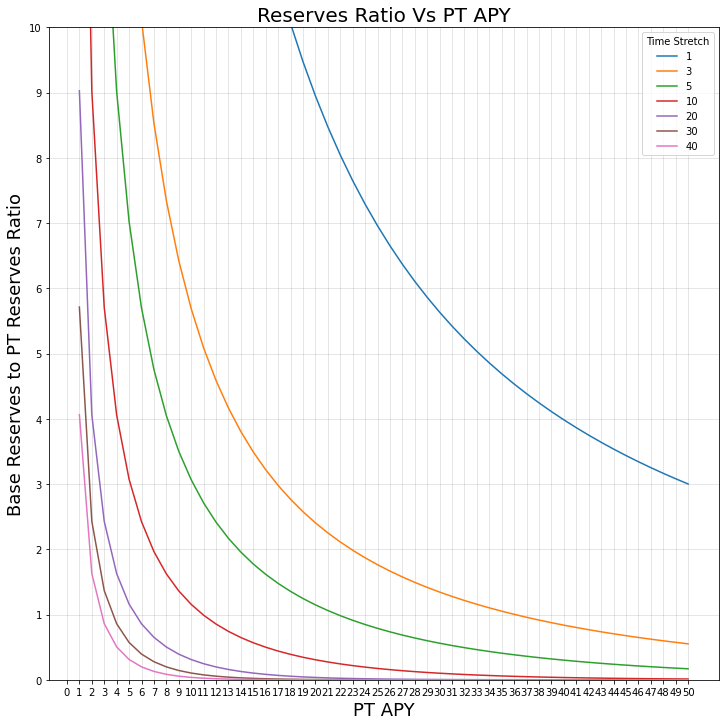

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12,12))

for time_stretch in [1,3,5,10,20,30,40]:
    apy_data = []
    x_reserves_data = []
    for APY in np.arange(1, 51, 1):
      days_until_maturity = 30
      y_reserves=100
      x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
      apy_data.append(APY)
      x_reserves_data.append(x_reserves/y_reserves)

    x=apy_data
    y=x_reserves_data
    ax.set_xlabel("PT APY",fontsize=18)
    ax.set_ylabel("Base Reserves to PT Reserves Ratio",fontsize=18)
    ax.set_xticks(np.arange(0, 51, 1))
    ax.set_ylim(0,10)
    ax.set_yticks(np.arange(0, 11, 1))
    ax.plot(x, y,label=time_stretch)
    ax.legend(title="Time Stretch")
plt.title("Reserves Ratio Vs PT APY",fontsize=20 )
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.2)
plt.show()

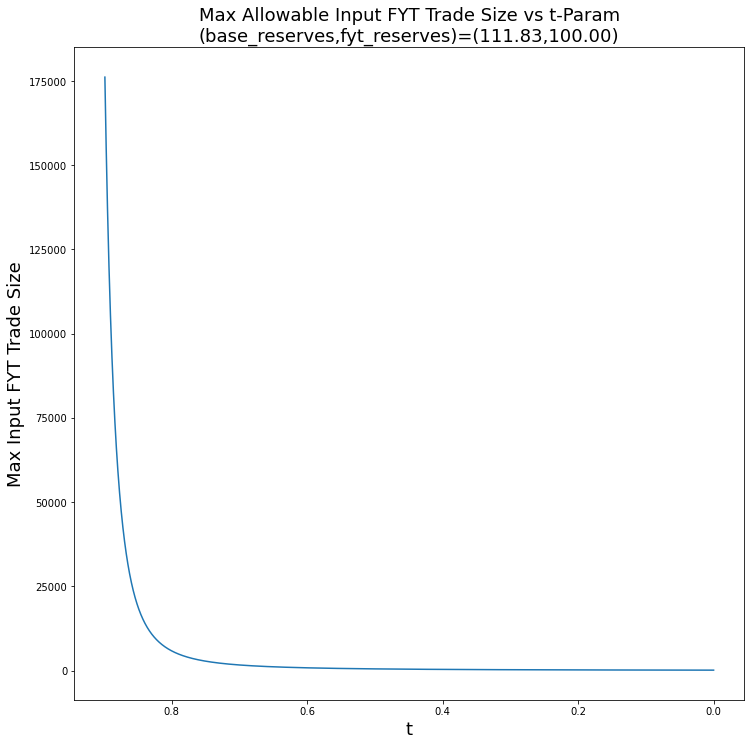

In [47]:
import numpy as np
import matplotlib.pyplot as plt

APY = 20
days_until_maturity = 90
time_stretch = 5
y_reserves = 100
x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
total_supply=x_reserves+y_reserves
epsilon=.0000001

times = []
max_trade_amounts = []

for t in np.arange(328, 0, -.1):
  times.append(t/365)
  max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,t/365)-epsilon
  max_trade_amounts.append(max_trade)


fig, ax = plt.subplots(figsize=(12,12))

x=times
y=max_trade_amounts
ax.set_title("Max Allowable Input FYT Trade Size vs t-Param\n(base_reserves,fyt_reserves)=({:.2f},{:.2f})".format(x_reserves,y_reserves),fontsize=18)
ax.set_xlabel("t",fontsize=18)
ax.set_ylabel("Max Input FYT Trade Size",fontsize=18)
ax.invert_xaxis()
ax.plot(x, y)

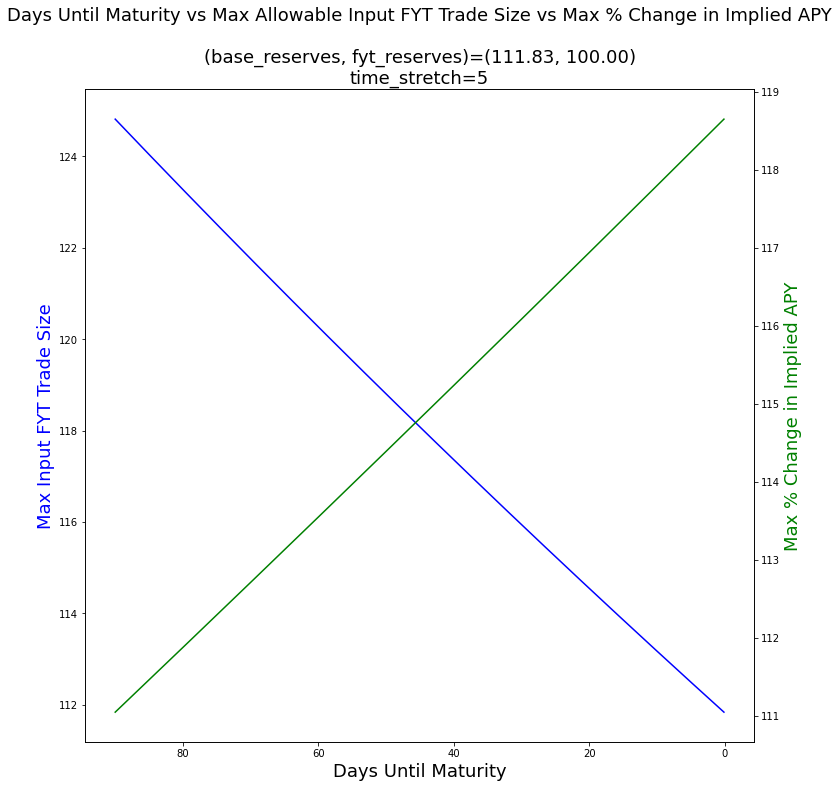

In [48]:
import matplotlib.pyplot as plt
import numpy as np
APY = 20
days_until_maturity = 90
time_stretch = 5
y_reserves = 100
x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
total_supply=x_reserves+y_reserves
epsilon=.0000001
g=.1
times = []
days_until_maturity_list = []
max_trade_amounts = []
resulting_apys = []

for t in np.arange(days_until_maturity, 0, -.1):
  times.append(t/(365*time_stretch))
  days_until_maturity_list.append(t)
  max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,t/(365*time_stretch))-epsilon
  max_trade_amounts.append(max_trade)
  (with_fee,without_fee,fee)=calc_out_given_in(max_trade,y_reserves+total_supply,x_reserves,"base",g,t/(365*time_stretch))
  resulting_apy=calc_apy(without_fee/max_trade,t)
  resulting_apys.append((resulting_apy-APY)/APY * 100)

fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()

x = days_until_maturity_list
y1 = max_trade_amounts
ax1.set_title("Days Until Maturity vs Max Allowable Input FYT Trade Size vs Max % Change in Implied APY\n\n(base_reserves, fyt_reserves)=({:.2f}, {:.2f})\ntime_stretch={:}".format(x_reserves,y_reserves,time_stretch),fontsize=18)
ax1.set_xlabel("Days Until Maturity",fontsize=18)
ax1.set_ylabel("Max Input FYT Trade Size",fontsize=18,color='b')
ax1.invert_xaxis()
ax1.plot(x, y1,'b-')

y2 = resulting_apys
ax2.set_ylabel("Max % Change in Implied APY",fontsize=18,color='g')
ax2.plot(x, y2,'g-')

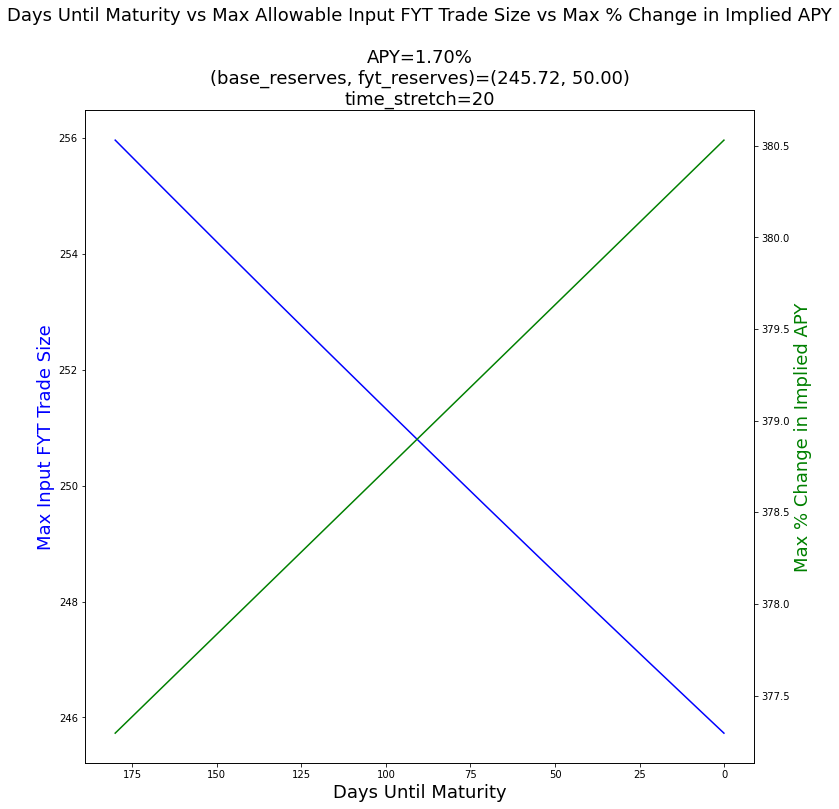

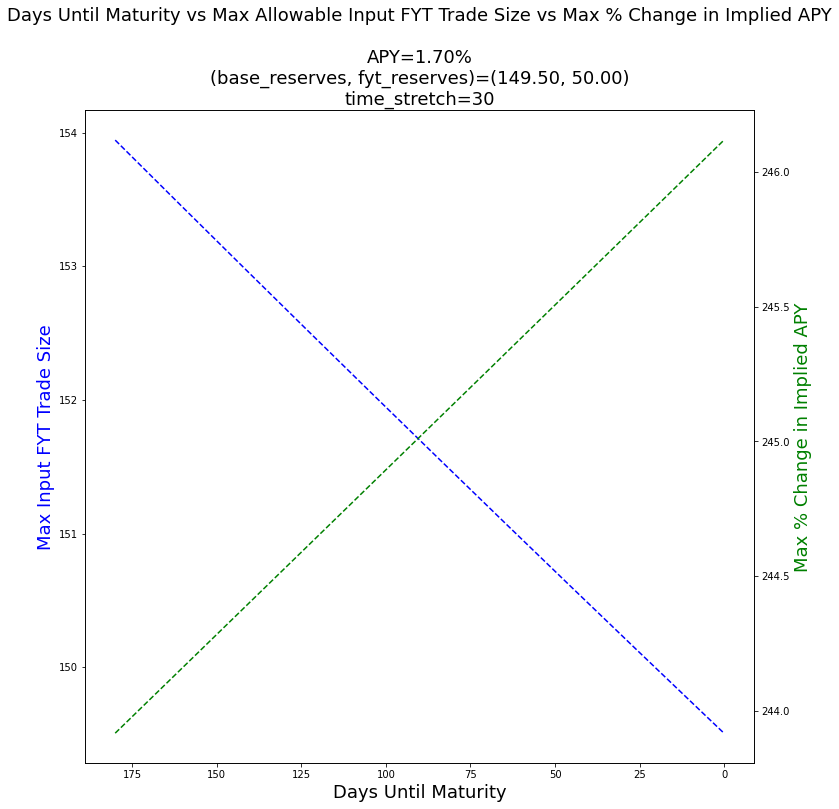

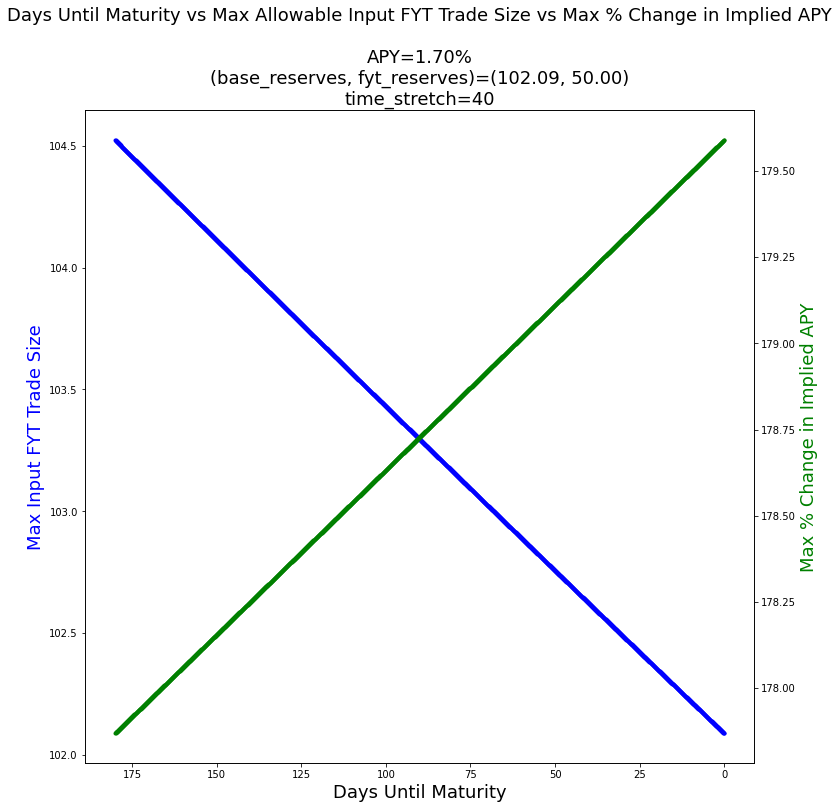

In [6]:

import matplotlib.pyplot as plt
import numpy as np

for time_stretch in [20,30,40]:
  fig, ax1 = plt.subplots(figsize=(12,12))
  APY = 1.7
  days_until_maturity = 180
  y_reserves = 50
  x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
  total_supply=x_reserves+y_reserves
  epsilon=.0000001
  g=.1
  times = []
  days_until_maturity_list = []
  max_trade_amounts = []
  resulting_apys = []

  for t in np.arange(days_until_maturity, 0, -.1):
    times.append(t/(365*time_stretch))
    days_until_maturity_list.append(t)
    max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,t/(365*time_stretch))-epsilon
    max_trade_amounts.append(max_trade)
    (with_fee,without_fee,fee)=calc_out_given_in(max_trade,y_reserves+total_supply,x_reserves,"base",g,t/(365*time_stretch))
    resulting_apy=calc_apy(without_fee/max_trade,t)
    resulting_apys.append((resulting_apy-APY)/APY * 100)


  ax2 = ax1.twinx()

  x = days_until_maturity_list
  y1 = max_trade_amounts
  ax1.set_title("Days Until Maturity vs Max Allowable Input FYT Trade Size vs Max % Change in Implied APY\n\nAPY={:.2f}%\n(base_reserves, fyt_reserves)=({:.2f}, {:.2f})\ntime_stretch={:}".format(APY,x_reserves,y_reserves,time_stretch),fontsize=18)
  ax1.set_xlabel("Days Until Maturity",fontsize=18)
  ax1.set_ylabel("Max Input FYT Trade Size",fontsize=18,color='b')
  ax1.invert_xaxis()
  y2 = resulting_apys
  ax2.set_ylabel("Max % Change in Implied APY",fontsize=18,color='g')

  if time_stretch == 20: 
    ax1.plot(x, y1,'b-')
    ax2.plot(x, y2,'g-')
  elif time_stretch == 30:
    ax1.plot(x, y1,'b--')
    ax2.plot(x, y2,'g--')
  elif time_stretch == 40:
    ax1.plot(x, y1,'b.')
    ax2.plot(x, y2,'g.')




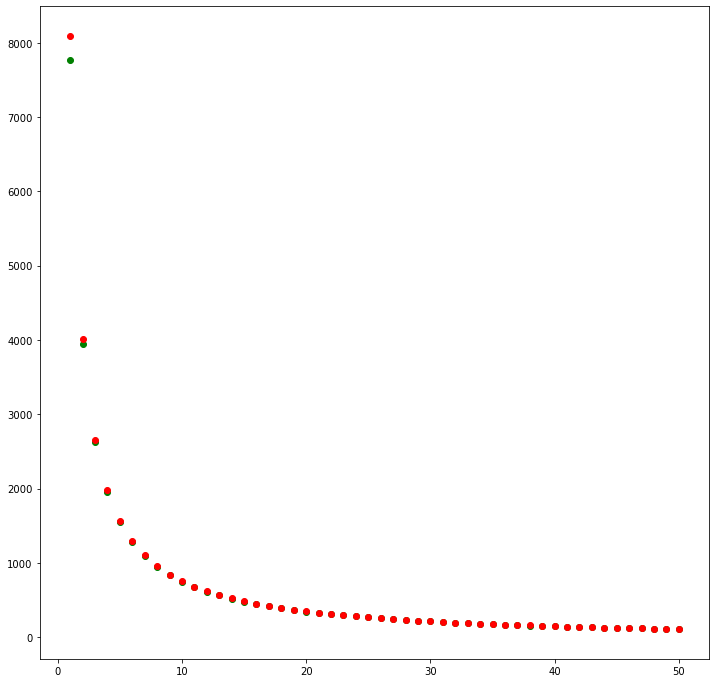

In [50]:

import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(12,12))

min_apy_changes = []
max_apy_changes = []
time_stretches = []
for time_stretch in np.arange(1, 51, 1):
  APY = 1.7
  days_until_maturity = 180
  y_reserves = 50
  x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
  total_supply=x_reserves
  epsilon=.0000001
  g=.1

  times = []
  days_until_maturity_list = []
  max_trade_amounts = []
  resulting_apys = []

  for t in np.arange(days_until_maturity, 0, -.1):
    times.append(t/(365*time_stretch))
    days_until_maturity_list.append(t)
    max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,t/(365*time_stretch))-epsilon
    max_trade_amounts.append(max_trade)
    (with_fee,without_fee,fee)=calc_out_given_in(max_trade,y_reserves+total_supply,x_reserves,"base",g,t/(365*time_stretch))
    resulting_apy=calc_apy(without_fee/max_trade,t)
    resulting_apys.append((resulting_apy-APY)/APY * 100)

  time_stretches.append(time_stretch)
  min_apy_changes.append(min(resulting_apys))
  max_apy_changes.append(max(resulting_apys))

ax1.scatter(time_stretches,min_apy_changes,color='g')
ax1.scatter(time_stretches,max_apy_changes,color='r')
#ax1.set_ylim(0,1000)

# this plot tells me that the difference between the min and max % change apy isnt very much

In [51]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cols = ["apy","tranche_length","time_stretch",\
        "x_reserves", "y_reserves",\
        "min_k","max_k",\
        "min_trade_amount","max_trade_amount",\
        "min_resulting_fyt_unit_prices","max_resulting_fyt_unit_prices",\
        "min_resulting_apy","max_resulting_apy",\
        "min_apy_change","max_apy_change"]


tests = []
g=.1
for y_reserves in np.arange(50, 1010, 50):
  for tranche_length in np.arange(30, 181, 30):
    for APY in np.arange(1, 51, 1):
      for time_stretch in np.arange(1, 40.1, .1):
        days_until_maturity = tranche_length
        x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
        total_supply=x_reserves+y_reserves
        epsilon=.0000001

        times = []
        days_until_maturity_list = []
        ks = []
        max_trade_amounts = []
        resulting_fyt_unit_prices = []
        resulting_apys = []
        resulting_apy_changes = []

        for day in np.arange(days_until_maturity, 0, -1):
          times.append(day/(365*time_stretch))
          days_until_maturity_list.append(day)
          k=calc_k(y_reserves+total_supply,x_reserves,day/(365*time_stretch))
          ks.append(k)
          max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,day/(365*time_stretch))-epsilon
          max_trade_amounts.append(max_trade)
          (with_fee,without_fee,fee)=calc_out_given_in(max_trade,y_reserves+total_supply,x_reserves,"base",g,day/(365*time_stretch))
          resulting_fyt_unit_price = without_fee/max_trade
          resulting_fyt_unit_prices.append(resulting_fyt_unit_price)
          resulting_apy=calc_apy(resulting_fyt_unit_price,day)
          resulting_apys.append(resulting_apy)
          resulting_apy_changes.append((resulting_apy-APY)/APY * 100)

        test = [APY,tranche_length,time_stretch,x_reserves,y_reserves,\
                min(ks),max(ks),\
                min(max_trade_amounts),max(max_trade_amounts),\
                min(resulting_fyt_unit_prices),max(resulting_fyt_unit_prices),\
                min(resulting_apys), max(resulting_apys),\
                min(resulting_apy_changes),max(resulting_apy_changes)]
        tests.append(test)

df = pd.DataFrame(tests,columns=cols)
#df.to_csv('apy_change.csv')
df

In [52]:
df.to_csv('apy_change_new.csv')

In [23]:
import pandas as pd
df = pd.read_csv('apy_change_new.csv') 
df = df.drop(columns=['Unnamed: 0']).reset_index()
cols = df.columns
for col in cols:
    df[col] = df[col].astype(float)
df.head()

,index,apy,tranche_length,time_stretch,x_reserves,y_reserves,min_k,max_k,min_trade_amount,max_trade_amount,min_resulting_fyt_unit_prices,max_resulting_fyt_unit_prices,min_resulting_apy,max_resulting_apy,min_apy_change,max_apy_change
0,0.0,1.0,30.0,1.0,9945.973215,50.0,9377.820657,19493.805999,9984.078473,11226.233414,0.885958,0.996183,138.750893,139.305986,13775.089280,13830.598628
1,1.0,1.0,30.0,1.1,9037.264293,50.0,9197.914398,17766.587835,9068.745581,10083.557405,0.896238,0.996529,126.244132,126.706281,12524.413204,12570.628120
2,2.0,1.0,30.0,1.2,8280.008247,50.0,8977.131142,16320.150672,8306.453800,9151.103163,0.904810,0.996816,115.814687,116.206351,11481.468686,11520.635115
3,3.0,1.0,30.0,1.3,7639.254414,50.0,8734.354241,15091.234849,7661.782505,8375.757498,0.912067,0.997060,106.984801,107.321674,10598.480126,10632.167361
4,4.0,1.0,30.0,1.4,7090.038034,50.0,8481.746401,14034.243640,7109.458767,7720.906520,0.918291,0.997268,99.412764,99.706150,9841.276407,9870.615019


In [24]:
import numpy as np
#df.to_csv('apy_change.csv')
pd.set_option('display.max_rows', None)
df['reserve_ratio']=df['x_reserves']/df['y_reserves']

df['time_stretch'] = round(df['time_stretch'],5)

reserve_ratio_filter=(df['reserve_ratio']>=.1)&(df['reserve_ratio']<=1)
price_discovery_filter=(df['max_apy_change']>=50)
df_filtered = df[reserve_ratio_filter & price_discovery_filter].reset_index()

apy_t_stretches=[]
for APY in np.arange(3, 51, 1):
    min_ts=df_filtered[df_filtered['apy']==APY]['time_stretch'].min()
    max_ts=df_filtered[df_filtered['apy']==APY]['time_stretch'].max()
    min_tl=df_filtered[(df_filtered['apy']==APY)&(df_filtered['time_stretch']>=min_ts)&(df_filtered['time_stretch']<=max_ts)]['tranche_length'].min()
    max_tl=df_filtered[(df_filtered['apy']==APY)&(df_filtered['time_stretch']>=min_ts)&(df_filtered['time_stretch']<=max_ts)]['tranche_length'].max()
    apy_t_stretches.append((APY,min_ts,max_ts,min_tl,max_tl))
     

In [25]:
import numpy as np

pd.reset_option("display.max_rows")
df['reserve_ratio']=df['x_reserves']/df['y_reserves']
df['spot_price']=(df['x_reserves']/(2*df['y_reserves']+df['x_reserves']))**(df['tranche_length']/(365*df['time_stretch']))
df['spot_apy']=(1-df['spot_price'])/(df['tranche_length']/365) * 100


# we want to target the time stretch that allows the reserve ratio to be equal to the spot price
reserve_ratio_filter=(df['reserve_ratio']-df['reserve_ratio']*0.05<=df['spot_price'])&(df['spot_price']<=df['reserve_ratio']+df['reserve_ratio']*0.05)&(df['reserve_ratio']<=1)
df_filtered = df[reserve_ratio_filter].reset_index()

apy_t_stretches=[]
for APY in np.arange(3, 51, 1):
    min_ts=df_filtered[df_filtered['apy']==APY]['time_stretch'].min()
    max_ts=df_filtered[df_filtered['apy']==APY]['time_stretch'].max()
    apy_t_stretches.append((APY,min_ts,max_ts))

df_filtered

,level_0,index,apy,tranche_length,time_stretch,x_reserves,y_reserves,min_k,max_k,min_trade_amount,max_trade_amount,min_resulting_fyt_unit_prices,max_resulting_fyt_unit_prices,min_resulting_apy,max_resulting_apy,min_apy_change,max_apy_change,reserve_ratio,spot_price,spot_apy
0,1138,1138.0,3.0,30.0,36.6,49.944268,50.0,197.774183,199.817692,49.952681,50.197466,0.994956,0.999832,6.136909,6.147140,104.563647,104.904655,0.998885,0.997534,3.0
1,1139,1139.0,3.0,30.0,36.7,49.719999,50.0,197.336825,199.369528,49.728360,49.971661,0.994964,0.999832,6.127244,6.137455,104.241468,104.581844,0.994400,0.997534,3.0
2,1140,1140.0,3.0,30.0,36.8,49.497069,50.0,196.902050,198.924040,49.505380,49.747207,0.994972,0.999832,6.117634,6.127826,103.921131,104.260879,0.989941,0.997534,3.0
3,1141,1141.0,3.0,30.0,36.9,49.275467,50.0,196.469838,198.481206,49.283728,49.524095,0.994980,0.999832,6.108079,6.118252,103.602623,103.941745,0.985509,0.997534,3.0
4,1142,1142.0,3.0,30.0,37.0,49.055183,50.0,196.040167,198.041005,49.063394,49.302312,0.994987,0.999833,6.098578,6.108733,103.285927,103.624428,0.981104,0.997534,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18735,2344840,2344840.0,48.0,180.0,2.3,792.155961,1000.0,698.780409,3551.772705,794.415159,1382.859874,0.572839,0.997156,86.618774,103.800563,80.455779,116.251173,0.792156,0.763288,48.0
18736,2344841,2344841.0,48.0,180.0,2.4,734.428166,1000.0,727.108474,3438.753269,736.475958,1261.962779,0.581973,0.997219,84.766602,101.489297,76.597087,111.436035,0.734428,0.763288,48.0
18737,2345231,2345231.0,49.0,180.0,2.3,759.607800,1000.0,687.970117,3487.316170,761.798358,1333.365434,0.569692,0.997124,87.256873,104.956104,78.075251,114.196131,0.759608,0.758356,49.0
18738,2345621,2345621.0,50.0,180.0,2.2,788.575865,1000.0,647.853285,3543.214189,790.930089,1416.572466,0.556679,0.997023,89.895687,108.643203,79.791374,117.286406,0.788576,0.753425,50.0


In [16]:
#df['time_stretch'] = round(df['time_stretch'],1)
#df[(df['apy']==9)&(df['tranche_length']==90)&(df['time_stretch']==9)]
#df_filtered[(df_filtered['apy']==10)]

,level_0,index,apy,tranche_length,time_stretch,x_reserves,y_reserves,min_k,max_k,min_trade_amount,max_trade_amount,min_resulting_fyt_unit_prices,max_resulting_fyt_unit_prices,min_resulting_apy,max_resulting_apy,min_apy_change,max_apy_change,reserve_ratio,spot_price,spot_apy
47,3619,3619.0,10.0,30.0,11.0,49.557637,50.0,192.198198,198.880702,49.585474,50.401799,0.983251,0.999439,20.377511,20.491186,103.775109,104.911859,0.991153,0.991781,10.0
48,3620,3620.0,10.0,30.0,11.1,48.820775,50.0,190.844013,197.411071,48.848056,49.647996,0.983338,0.999442,20.271775,20.384754,102.717745,103.847540,0.976415,0.991781,10.0
49,3621,3621.0,10.0,30.0,11.2,48.098392,50.0,189.515455,195.970284,48.125131,48.909132,0.983424,0.999444,20.168026,20.280323,101.680262,102.803234,0.961968,0.991781,10.0
50,3622,3622.0,10.0,30.0,11.3,47.390102,50.0,188.211871,194.557571,47.416314,48.184803,0.983507,0.999447,20.066213,20.177840,100.662126,101.778402,0.947802,0.991781,10.0
173,23168,23168.0,10.0,60.0,10.9,49.966563,50.0,186.156699,199.695283,49.994828,51.700517,0.966462,0.999435,20.402535,20.635704,104.025351,106.357036,0.999331,0.983562,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,2330068,2330068.0,10.0,180.0,10.9,971.769287,1000.0,2781.455281,3935.892413,972.322956,1078.521823,0.901020,0.999431,20.071028,20.784153,100.710283,107.841532,0.971769,0.950685,10.0
18633,2330069,2330069.0,10.0,180.0,11.0,957.110058,1000.0,2770.216550,3906.704914,957.652533,1061.648716,0.901532,0.999434,19.967167,20.675908,99.671667,106.759079,0.957110,0.950685,10.0
18634,2330070,2330070.0,10.0,180.0,11.1,942.742116,1000.0,2759.099868,3878.096349,943.273701,1045.128956,0.902034,0.999436,19.865277,20.569718,98.652767,105.697179,0.942742,0.950685,10.0
18635,2330071,2330071.0,10.0,180.0,11.2,928.657598,1000.0,2748.104881,3850.051126,929.178588,1028.952405,0.902527,0.999439,19.765305,20.465528,97.653050,104.655276,0.928658,0.950685,10.0


Text(0, 0.5, 'Time Stretch')

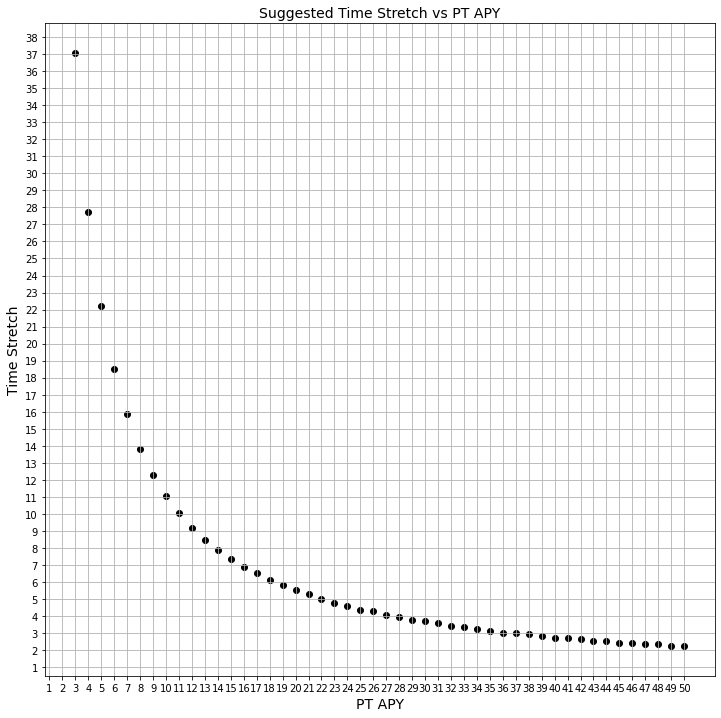

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))
apys = [apy for apy,min_ts,max_ts in apy_t_stretches]
mean_tss= [(min_ts+max_ts)/2 for apy,min_ts,max_ts in apy_t_stretches]
err_tss= [max_ts-(min_ts+max_ts)/2 for apy,min_ts,max_ts in apy_t_stretches]
plt.yticks(np.arange(0,41, 1))
plt.xticks(np.arange(0,51, 1))
#plt.errorbar(apys, mean_tss, yerr=err_tss, fmt='o', color='black',
#             ecolor='red', elinewidth=3, capsize=0);
plt.scatter(apys,mean_tss,color='black')
plt.grid(True)
plt.title('Suggested Time Stretch vs PT APY', fontsize=14)
plt.xlabel('PT APY', fontsize=14)
plt.ylabel('Time Stretch', fontsize=14)

In [27]:
apy_t_stretches

[(3, 36.4, 37.7),
 (4, 27.2, 28.3),
 (5, 21.8, 22.6),
 (6, 18.1, 18.9),
 (7, 15.5, 16.2),
 (8, 13.5, 14.1),
 (9, 12.0, 12.6),
 (10, 10.8, 11.3),
 (11, 9.8, 10.3),
 (12, 9.0, 9.4),
 (13, 8.3, 8.7),
 (14, 7.7, 8.1),
 (15, 7.2, 7.5),
 (16, 6.7, 7.1),
 (17, 6.4, 6.7),
 (18, 6.0, 6.3),
 (19, 5.7, 6.0),
 (20, 5.4, 5.7),
 (21, 5.2, 5.4),
 (22, 4.9, 5.1),
 (23, 4.7, 4.9),
 (24, 4.5, 4.7),
 (25, 4.3, 4.5),
 (26, 4.2, 4.4),
 (27, 4.0, 4.2),
 (28, 3.9, 4.0),
 (29, 3.7, 3.9),
 (30, 3.6, 3.8),
 (31, 3.5, 3.7),
 (32, 3.4, 3.5),
 (33, 3.3, 3.4),
 (34, 3.2, 3.3),
 (35, 3.1, 3.2),
 (36, 3.0, 3.1),
 (37, 2.9, 3.1),
 (38, 2.9, 3.0),
 (39, 2.8, 2.9),
 (40, 2.7, 2.8),
 (41, 2.7, 2.8),
 (42, 2.6, 2.7),
 (43, 2.5, 2.6),
 (44, 2.5, 2.6),
 (45, 2.4, 2.5),
 (46, 2.4, 2.5),
 (47, 2.3, 2.4),
 (48, 2.3, 2.4),
 (49, 2.2, 2.3),
 (50, 2.2, 2.3)]

In [28]:
from scipy.optimize import curve_fit

def objective(x,a,b):
    return a/(b*x)

x = apys
y = mean_tss
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f /( %.5f * x)' % (a, b))

y = 3.09396 /( 0.02789 * x)


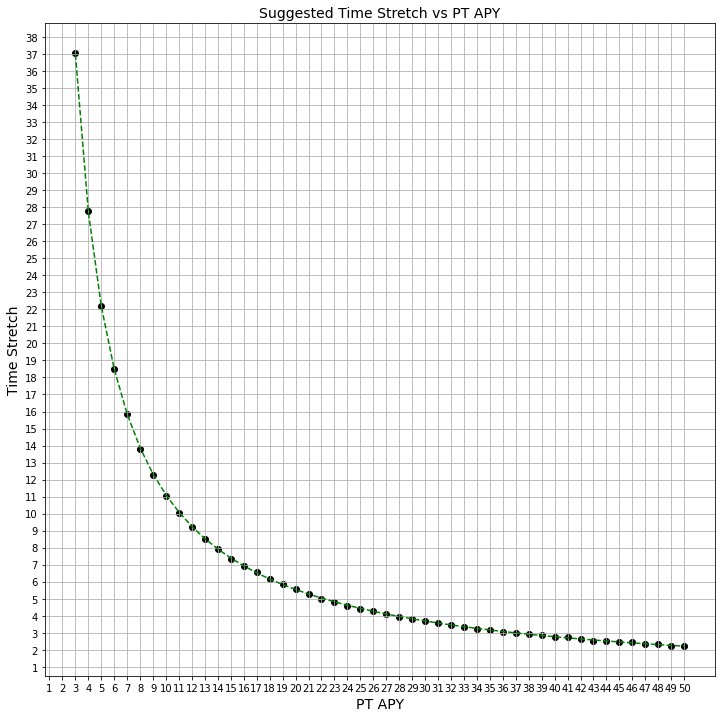

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))
plt.yticks(np.arange(0,41, 1))
plt.xticks(np.arange(0,51, 1))
#plt.errorbar(apys, mean_tss, yerr=err_tss, fmt='o', color='black',
#             ecolor='red', elinewidth=3, capsize=0);
plt.scatter(apys,mean_tss,color='black')
plt.grid(True)
plt.title('Suggested Time Stretch vs PT APY', fontsize=14)
plt.xlabel('PT APY', fontsize=14)
plt.ylabel('Time Stretch', fontsize=14)

x = np.arange(3,51,1)
y = 3.09396 /( 0.02789 * x)
plt.plot(x, y, '--', color="green")

In [30]:
APY = 1
tranche_length = 30
days_until_maturity = 1
time_stretch = 5
y_reserves = 50
x_reserves = calc_x_reserves(APY,y_reserves,tranche_length,time_stretch)
total_supply=x_reserves
print("required x_reserves: " + str(x_reserves))
g=0.05
t=days_until_maturity/(365*time_stretch)
k=calc_k(y_reserves+total_supply,x_reserves,t)
print("k: " + str(k))
print("k^(1/(1-t)): " + str(k**(1/(1-t))))
max_trade = calc_max_trade(y_reserves+total_supply,x_reserves,t) - .0001
print("max valid trade = {:}".format(max_trade))
(with_fee,without_fee,fee)=calc_out_given_in(max_trade,y_reserves+total_supply,x_reserves,"base",g,t)
print("Total Price after max trade: " + str(without_fee))
unit_price = without_fee/max_trade
print("Unit Price after max trade: " + str(unit_price))
resulting_apy=calc_apy(unit_price,1)
print("resulting apy: " + str(resulting_apy))
(resulting_apy-APY)/APY * 100

required x_reserves: 1949.5947901659702
k: 3932.8032677637043
k^(1/(1-t)): 3950.6904429052515
max valid trade = 1951.0955527392814
Total Price after max trade: 1949.5946911746807
Unit Price after max trade: 0.9992307595788974
resulting apy: 28.07727537024496


2707.7275370244956

In [61]:
#df = df.drop(columns=['Unnamed: 0']).reset_index()
#df_filtered = df[(df['time_stretch']>=3)]
#df_filtered.head()

,apy,tranche_length,time_stretch,x_reserves,y_reserves,min_k,max_k,min_trade_amount,max_trade_amount,min_resulting_fyt_unit_prices,max_resulting_fyt_unit_prices,min_resulting_apy,max_resulting_apy,min_apy_change,max_apy_change,reserve_ratio
20,1,30,3.0,1641.106691,50,2719.353525,3309.714748,1643.218273,1706.797920,0.961512,0.998715,46.827060,46.903542,4582.706001,4590.354194,32.822134
21,1,30,3.1,1587.369516,50,2651.259186,3203.758908,1589.346974,1648.814803,0.962734,0.998756,45.340710,45.413135,4434.070953,4441.313457,31.747390
22,1,30,3.2,1536.991175,50,2586.293235,3104.375233,1538.846892,1594.589258,0.963879,0.998794,43.947159,44.015880,4294.715924,4301.588048,30.739823
23,1,30,3.3,1489.666319,50,2524.263245,3010.970857,1491.411201,1543.767523,0.964955,0.998830,42.637982,42.703311,4163.798205,4170.331145,29.793326
24,1,30,3.4,1445.125523,50,2464.989863,2923.022127,1446.769210,1496.038892,0.965968,0.998864,41.405741,41.467956,4040.574118,4046.795552,28.902510


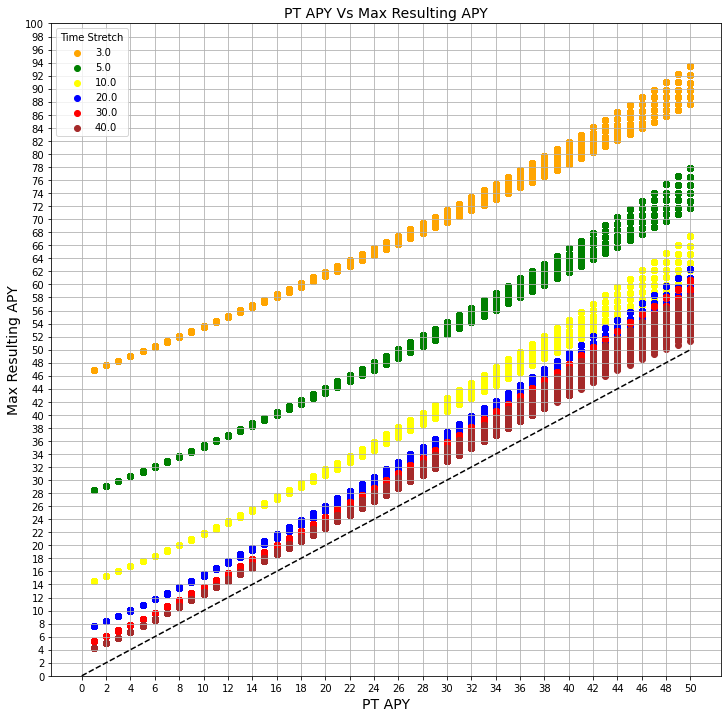

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[(df['time_stretch']==3) & (df['tranche_length']<=180)]

plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], color='orange',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[(df['time_stretch']==5) & (df['tranche_length']<=180)]

plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], color='green',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[(df['time_stretch']==10) & (df['tranche_length']<=180)]

plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], color='yellow',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[(df['time_stretch']==20) & (df['tranche_length']<=180)]

plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], color='blue',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[(df['time_stretch']==30) & (df['tranche_length']<=180)]
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], color='red',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[(df['time_stretch']==40) & (df['tranche_length']<=180)]
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], color='brown',label= df_filtered['time_stretch'].iloc[0])


plt.title('PT APY Vs Max Resulting APY', fontsize=14)
plt.xlabel('PT APY', fontsize=14)
plt.ylabel('Max Resulting APY', fontsize=14)
plt.grid(True)
plt.legend(title="Time Stretch")
x = np.arange(0,51,1)
y = x
plt.plot(x, y, '--', color="black")
plt.yticks(np.arange(0,101, 2))
plt.xticks(np.arange(0,51, 2))
plt.ylim(0,100)
plt.show()

### This tells me that yield bearing asset APY does have an affect on Max % APY Change

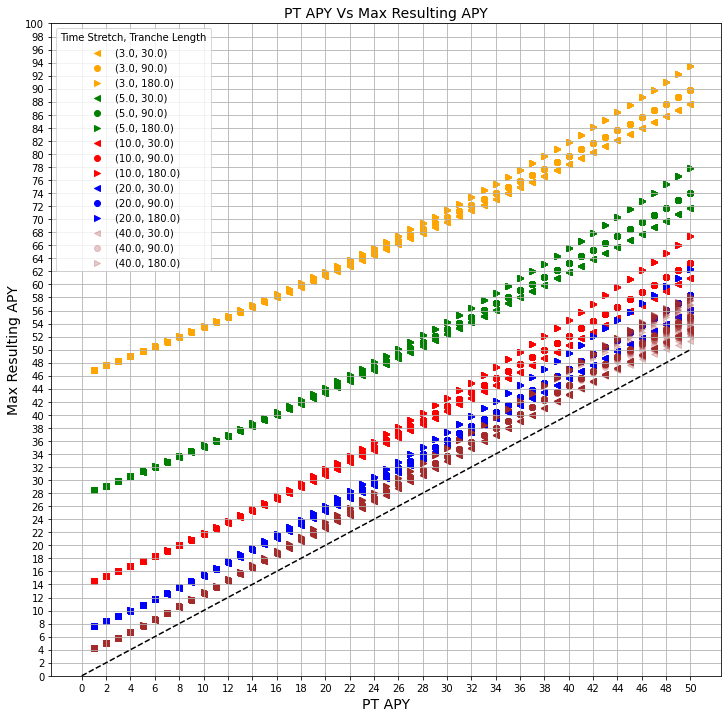

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[(df['time_stretch']==3) & (df['tranche_length']==30)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='<', color='orange',label=label)
df_filtered = df[(df['time_stretch']==3) & (df['tranche_length']==90)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='o', color='orange',label=label)
df_filtered = df[(df['time_stretch']==3) & (df['tranche_length']==180)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='>', color='orange',label=label)

df_filtered = df[(df['time_stretch']==5) & (df['tranche_length']==30)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='<', color='green',label=label)
df_filtered = df[(df['time_stretch']==5) & (df['tranche_length']==90)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='o', color='green',label=label)
df_filtered = df[(df['time_stretch']==5) & (df['tranche_length']==180)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='>', color='green',label=label)

df_filtered = df[(df['time_stretch']==10) & (df['tranche_length']==30)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='<', color='red',label=label)
df_filtered = df[(df['time_stretch']==10) & (df['tranche_length']==90)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='o', color='red',label=label)
df_filtered = df[(df['time_stretch']==10) & (df['tranche_length']==180)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='>', color='red',label=label)

df_filtered = df[(df['time_stretch']==20) & (df['tranche_length']==30)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='<', color='blue',label=label)
df_filtered = df[(df['time_stretch']==20) & (df['tranche_length']==90)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='o', color='blue',label=label)
df_filtered = df[(df['time_stretch']==20) & (df['tranche_length']==180)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='>', color='blue',label=label)



df_filtered = df[(df['time_stretch']==40) & (df['tranche_length']==30)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='<',color='brown',alpha=.25,label=label)
df_filtered = df[(df['time_stretch']==40) & (df['tranche_length']==90)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='o',color='brown',alpha=.25,label=label)
df_filtered = df[(df['time_stretch']==40) & (df['tranche_length']==180)]
label=(df_filtered['time_stretch'].iloc[0],df_filtered['tranche_length'].iloc[0])
plt.scatter(df_filtered['apy'], df_filtered['max_resulting_apy'], marker='>',color='brown',alpha=.25,label=label)


plt.title('PT APY Vs Max Resulting APY', fontsize=14)
plt.xlabel('PT APY', fontsize=14)
plt.ylabel('Max Resulting APY', fontsize=14)
plt.grid(True)
plt.legend(title="Time Stretch, Tranche Length")
x = np.arange(0,51,1)
y = x
plt.plot(x, y, '--', color="black")
plt.yticks(np.arange(0,101, 2))
plt.ylim(0,100)
plt.xticks(np.arange(0,51, 2))
plt.show()

### This tells me that yield bearing asset APY does have an affect on Max % APY Change


In [ ]:
x = np.arange(0,50,1)
y = x
plt.plot(x, y)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[df['time_stretch']==5]

plt.scatter(df_filtered['apy'], df_filtered['max_apy_change'], color='green',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[df['time_stretch']==25]

plt.scatter(df_filtered['apy'], df_filtered['max_apy_change'], color='blue',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[df['time_stretch']==50]

plt.scatter(df_filtered['apy'], df_filtered['max_apy_change'], color='red',label= df_filtered['time_stretch'].iloc[0])

plt.title('APY Vs Max Percent APY Change', fontsize=14)
plt.xlabel('APY', fontsize=14)
plt.ylabel('Max Percent APY Change', fontsize=14)
plt.grid(True)
plt.legend(title="Time Stretch")
plt.show()

### This tells me that yield bearing asset APY does have an affect on Max % APY Change

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[df['apy']==1]

plt.scatter(df_filtered['time_stretch'], df_filtered['max_apy_change'], color='green',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==5]

plt.scatter(df_filtered['time_stretch'], df_filtered['max_apy_change'], color='blue',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==10]

plt.scatter(df_filtered['time_stretch'], df_filtered['max_apy_change'], color='red',label= df_filtered['apy'].iloc[0])

plt.title('Time Stretch Vs Max Percent APY Change', fontsize=14)
plt.xlabel('Time Stretch', fontsize=14)
plt.ylabel('Max Percent APY Change', fontsize=14)
plt.grid(True)
plt.legend(title="APY")
plt.show()


### This tells me that time stretch does have an affect on Max % APY Change

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[df['apy']==1]

plt.scatter(df_filtered['tranche_length'], df_filtered['max_apy_change'], color='green',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==5]

plt.scatter(df_filtered['tranche_length'], df_filtered['max_apy_change'], color='blue', label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==10]

plt.scatter(df_filtered['tranche_length'], df_filtered['max_apy_change'], color='red',label= df_filtered['apy'].iloc[0])

plt.title('Tranche Length Vs Max Percent APY Change', fontsize=14)
plt.xlabel('Tranche Length', fontsize=14)
plt.ylabel('Max Percent APY Change', fontsize=14)
plt.grid(True)
plt.legend(title="APY", loc='upper right')
plt.show()

## This tells me that Tranche Length has virtually no affect on Max % APY Change

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[df['apy']==1]

plt.scatter(df_filtered['y_reserves'], df_filtered['max_apy_change'], color='green',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==5]

plt.scatter(df_filtered['y_reserves'], df_filtered['max_apy_change'], color='blue',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==10]

plt.scatter(df_filtered['y_reserves'], df_filtered['max_apy_change'], color='red',label= df_filtered['apy'].iloc[0])

plt.title('FYT Reserves Vs Max Percent APY Change', fontsize=14)
plt.xlabel('FYT Reserves', fontsize=14)
plt.ylabel('Max Percent APY Change', fontsize=14)
plt.grid(True)
plt.legend(title="APY", loc='upper right')
plt.show()

## This tells me that reserve size has virtually no affect on Max % APY Change

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

#df_filtered = df[(df['time_stretch']==5) & (df['y_reserves']==50) & (df['tranche_length']==30)]
df_filtered = df[(df['time_stretch']==5)  & (df['tranche_length']==30)]

plt.scatter(df_filtered['apy'], df_filtered['max_trade_amount'], color='green',label= df_filtered['tranche_length'].iloc[0])

#df_filtered = df[(df['time_stretch']==5) & (df['y_reserves']==500) & (df['tranche_length']==30)]

#plt.scatter(df_filtered['apy'], df_filtered['max_apy_change'], color='blue',label= df_filtered['y_reserves'].iloc[0])

#df_filtered = df[(df['time_stretch']==5) & (df['y_reserves']==1000) & (df['tranche_length']==30)]

#plt.scatter(df_filtered['apy'], df_filtered['max_apy_change'], color='red',label= df_filtered['y_reserves'].iloc[0])

plt.title('APY Vs Max Trade Amount', fontsize=14)
plt.xlabel('APY', fontsize=14)
plt.ylabel('Max Trade Amount', fontsize=14)
plt.grid(True)
plt.legend(title="Tranche Length")
plt.ylim(0,100)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[df['time_stretch']==5]

plt.scatter(df_filtered['apy'], df_filtered['min_resulting_fyt_unit_prices'], color='green',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[df['time_stretch']==25]

plt.scatter(df_filtered['apy'], df_filtered['min_resulting_fyt_unit_prices'], color='blue',label= df_filtered['time_stretch'].iloc[0])

df_filtered = df[df['time_stretch']==50]

plt.scatter(df_filtered['apy'], df_filtered['min_resulting_fyt_unit_prices'], color='red',label= df_filtered['time_stretch'].iloc[0])

plt.title('APY Vs Max Percent APY Change', fontsize=14)
plt.xlabel('APY', fontsize=14)
plt.ylabel('Min Unit FYT Price, fontsize=14)
plt.grid(True)
plt.legend(title="Time Stretch")
plt.show()

### This tells me that yield bearing asset APY does have an affect on Max % APY Change

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,12))

df_filtered = df[df['apy']==5]

plt.scatter(df_filtered['time_stretch'], df_filtered['min_resulting_fyt_unit_prices'], color='green',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==25]

plt.scatter(df_filtered['time_stretch'], df_filtered['min_resulting_fyt_unit_prices'], color='blue',label= df_filtered['apy'].iloc[0])

df_filtered = df[df['apy']==50]

plt.scatter(df_filtered['time_stretch'], df_filtered['min_resulting_fyt_unit_prices'], color='red',label= df_filtered['apy'].iloc[0])

plt.title('APY Vs Max Percent APY Change', fontsize=14)
plt.xlabel('Time Stretch', fontsize=14)
plt.ylabel('Min Unit FYT Price', fontsize=14)
plt.grid(True)
plt.legend(title="APY")
plt.show()



In [ ]:
df.to_csv('apy_change.csv')

In [20]:
APY = 8.66
term_length = 7
days_until_maturity = 4
time_stretch = 9
y_reserves = 177.52
x_reserves = 2995.64 #calc_x_reserves(APY,y_reserves,term_length-days_until_maturity,time_stretch)
print("(APY,y_reserves,days_until_maturity,time_stretch): "+str((APY,y_reserves,days_until_maturity,time_stretch)))
print("required x_reserves: " + str(x_reserves))
total_supply=x_reserves
price=calc_price(x_reserves,y_reserves,total_supply,days_until_maturity,time_stretch)
print("resulting price: " + str(price))
print("check apy: " + str(calc_apy(price,days_until_maturity)))

(APY,y_reserves,days_until_maturity,time_stretch): (8.75, 100, 4, 9)
required x_reserves: 83.43640554232714
resulting price: 0.9997795245158113
check apy: 2.011838793221768


In [29]:
x_reserves = 1856051.71
y_reserves = 1425357.41
total_supply = x_reserves+1425357.41
APY = 11.4
unit_price = 0.9728
t = 85/(365*9)

(x_reserves/(y_reserves+total_supply))**t

0.9762094163591135

In [30]:
3284587796090403818248754/10**18


3284587.796090404

In [31]:
1856051.71 + 1425357.41

3281409.12

In [38]:
3.09396 /( 0.02789 * 20)

5.546719254212979

In [21]:
5.11436 /( 0.04610 * 10)

11.09405639913232